In [2]:
import gym_sokoban.envs
from gym_sokoban.envs import SokobanEnv
from gym.spaces import Discrete, Box
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from collections import deque
from copy import deepcopy
from Networks import ValueNetwork, ClassificationNetwork

In [3]:
solved = np.load("solved_state.npy")

In [4]:
solved.shape

(3431, 96, 96, 3)

In [5]:
dead_end = np.load("dead_end_state.npy")
dead_end.shape

(3431, 96, 96, 3)

In [6]:
simple = np.load("simple_state.npy")
simple.shape

(3431, 96, 96, 3)

In [7]:
def prepare_for_network(net_type, solved=solved, dead_end=dead_end):
    if net_type == 'value':
        target_solved = np.full(solved.shape[0], 10.0)
        target_dead_end = np.full(dead_end.shape[0], -5.0)
        target_simple = np.full(simple.shape[0], 0.0)
    else:
        target_solved = np.full(solved.shape[0], 0)
        target_dead_end = np.full(dead_end.shape[0], 1)
        target_simple = np.full(simple.shape[0], 2)

    targets = np.concatenate([target_solved, target_dead_end, target_simple])
    states_to_prelearn = np.concatenate([solved, dead_end, simple])

    perm = np.random.permutation(states_to_prelearn.shape[0])
    states_to_prelearn, targets = states_to_prelearn[perm], targets[perm]
    
    return states_to_prelearn[:450], targets[:450], states_to_prelearn[450:], targets[450:]

In [8]:
env = SokobanEnv((6, 6), 50, 2)

In [9]:
X_train, Y_train, X_test, Y_test = prepare_for_network('value')

In [10]:
epochs = 20
batch_size = 64

In [20]:
prelearn_network = ValueNetwork(env.observation_space.shape, learning_rate = 1e-2)
history = prelearn_network.fit(X_train, Y_train, epochs, batch_size)

Epoch 1/20
6/6 [==============================] - 0s 23ms/step - loss: 44.0129 - mean_squared_error: 44.0129 - val_loss: 37.8290 - val_mean_squared_error: 37.8290
Epoch 2/20
6/6 [==============================] - 0s 10ms/step - loss: 38.7662 - mean_squared_error: 38.7662 - val_loss: 33.8989 - val_mean_squared_error: 33.8989
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 34.8045 - mean_squared_error: 34.8045 - val_loss: 25.7953 - val_mean_squared_error: 25.7953
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 20.2551 - mean_squared_error: 20.2551 - val_loss: 11.3278 - val_mean_squared_error: 11.3278
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 12.4246 - mean_squared_error: 12.4246 - val_loss: 10.1563 - val_mean_squared_error: 10.1563
Epoch 6/20
6/6 [==============================] - 0s 8ms/step - loss: 6.8685 - mean_squared_error: 6.8685 - val_loss: 8.6634 - val_mean_squared_error: 8.6634
Epoch 7/20
6/6 [==============

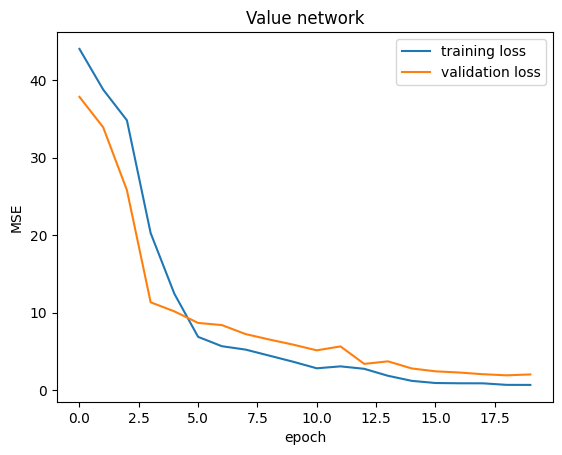

In [21]:
plt.title('Value network')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend()

In [22]:
prelearn_network.model.evaluate(X_test, Y_test)

308/308 [==============================] - 1s 2ms/step - loss: 1.9220 - mean_squared_error: 1.9220


[1.9219905138015747, 1.9219905138015747]

In [ ]:
prelearn_network.save_weights('value_network')

In [32]:
X_train, Y_train, X_test, Y_test = prepare_for_network('classification')
prelearn_network = ClassificationNetwork(env.observation_space.shape, learning_rate = 1e-2)
history = prelearn_network.fit(X_train, Y_train, 20, batch_size)

Epoch 1/20
6/6 [==============================] - 0s 21ms/step - loss: 1.4116 - accuracy: 0.3389 - val_loss: 1.0547 - val_accuracy: 0.3222
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 1.0515 - accuracy: 0.4000 - val_loss: 0.8841 - val_accuracy: 0.6333
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 0.9461 - accuracy: 0.5556 - val_loss: 0.6625 - val_accuracy: 0.8667
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 0.7349 - accuracy: 0.6667 - val_loss: 0.6912 - val_accuracy: 0.7333
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6382 - accuracy: 0.7667 - val_loss: 0.4719 - val_accuracy: 0.8222
Epoch 6/20
6/6 [==============================] - 0s 8ms/step - loss: 0.5357 - accuracy: 0.7806 - val_loss: 0.3867 - val_accuracy: 0.8556
Epoch 7/20
6/6 [==============================] - 0s 8ms/step - loss: 0.5126 - accuracy: 0.8028 - val_loss: 0.3942 - val_accuracy: 0.9000
Epoch 8/20
6/6 [=================

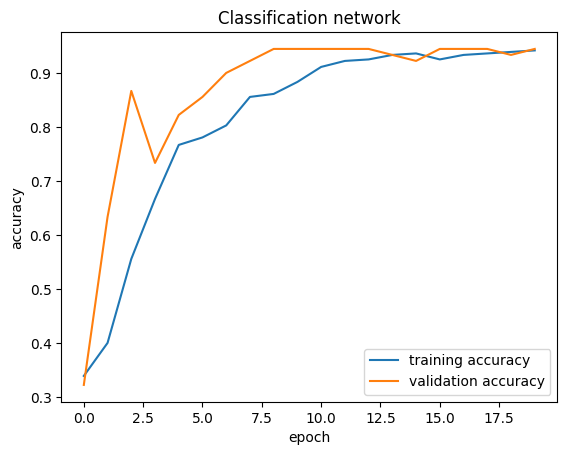

In [33]:
plt.title('Classification network')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

In [34]:
prelearn_network.model.evaluate(X_test, Y_test)

308/308 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9397


[0.22046667337417603, 0.9396525621414185]

In [ ]:
prelearn_network.save_weights('classification_network')